In [ ]:
"""
Problem Statement No. 08 
1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.  
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset      
Use :Social_Network_Ads.csv 
"""

In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('Social_Network_Ads.csv')

In [15]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [16]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
df.drop('User ID',axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.6+ KB


In [19]:
df = pd.get_dummies(df , columns = ['Gender'],drop_first=True,dtype=int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    float64
 1   EstimatedSalary  400 non-null    float64
 2   Purchased        400 non-null    int64  
 3   Gender_Male      400 non-null    int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 11.1 KB


In [21]:
X = df[['Age','EstimatedSalary','Gender_Male']]
Y = df['Purchased']

In [22]:
X

,Age,EstimatedSalary,Gender_Male
0,19.0,19000.0,1
1,35.0,20000.0,1
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,1
...,...,...,...
395,46.0,41000.0,0
396,51.0,23000.0,1
397,50.0,20000.0,0
398,36.0,33000.0,1


In [23]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=5)

In [26]:
x_train

,Age,EstimatedSalary,Gender_Male
24,46.0,23000.0,1
33,28.0,44000.0,0
396,51.0,23000.0,1
273,39.0,106000.0,1
246,35.0,50000.0,0
...,...,...,...
73,33.0,113000.0,0
118,40.0,59000.0,1
189,28.0,32000.0,1
206,55.0,130000.0,0


In [27]:
x_test

,Age,EstimatedSalary,Gender_Male
218,46.0,96000.0,0
191,19.0,26000.0,0
117,36.0,52000.0,1
50,24.0,32000.0,0
348,39.0,77000.0,1
...,...,...,...
368,38.0,71000.0,1
89,35.0,50000.0,1
182,32.0,117000.0,0
219,59.0,143000.0,1


In [28]:
y_train

24     1
33     0
396    1
273    1
246    0
      ..
73     0
118    0
189    0
206    1
355    1
Name: Purchased, Length: 300, dtype: int64

In [29]:
y_test

218    0
191    0
117    0
50     0
348    0
      ..
368    0
89     0
182    1
219    1
18     1
Name: Purchased, Length: 100, dtype: int64

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(x_train)

MinMaxScaler()

In [33]:
x_train_scaled = scaler.transform(x_train)

In [34]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)

In [35]:
x_train_scaled

,Age,EstimatedSalary,Gender_Male
0,0.666667,0.059259,1.0
1,0.238095,0.214815,0.0
2,0.785714,0.059259,1.0
3,0.500000,0.674074,1.0
4,0.404762,0.259259,0.0
...,...,...,...
295,0.357143,0.725926,0.0
296,0.523810,0.325926,1.0
297,0.238095,0.125926,1.0
298,0.880952,0.851852,0.0


In [40]:
x_test_scaled = scaler.transform(x_test)

In [41]:
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

In [42]:
x_test_scaled

,Age,EstimatedSalary,Gender_Male
0,0.666667,0.600000,0.0
1,0.023810,0.081481,0.0
2,0.428571,0.274074,1.0
3,0.142857,0.125926,0.0
4,0.500000,0.459259,1.0
...,...,...,...
95,0.476190,0.414815,1.0
96,0.404762,0.259259,1.0
97,0.333333,0.755556,0.0
98,0.976190,0.948148,1.0


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression(random_state=0).fit(x_train_scaled,y_train)

In [45]:
predected_value = clf.predict(x_test_scaled)

In [46]:
predected_value

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import (
confusion_matrix,
accuracy_score,
precision_score,
recall_score,
f1_score)

In [48]:
conf_matrix = confusion_matrix(y_test,predected_value)
conf_matrix

array([[62,  4],
       [13, 21]], dtype=int64)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

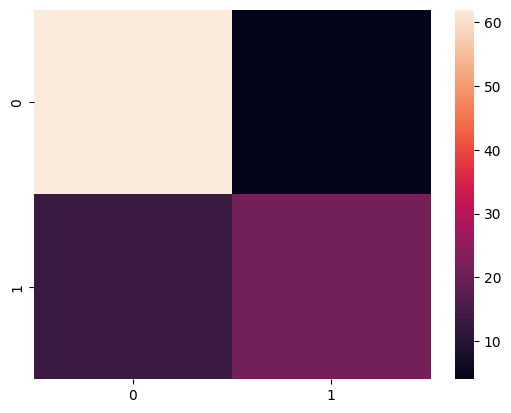

In [51]:
ax = sns.heatmap(conf_matrix )

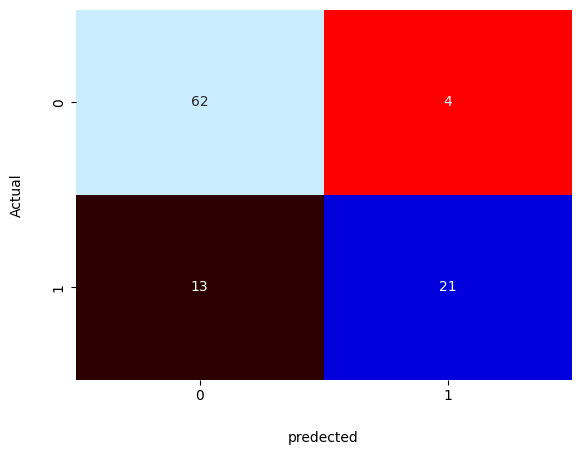

In [52]:
ax = sns.heatmap( conf_matrix,annot=True,fmt='d',cbar=False,cmap='flag',vmax=175 )
ax.set_xlabel("predected", labelpad=20)
ax.set_ylabel("Actual" , labelpad=20)
plt.show()

In [53]:
accuracy = accuracy_score(y_test , predected_value)
print("Accuracy = ",accuracy)

Accuracy =  0.83


In [58]:
ErrorRate = 1 - accuracy
print("Error Rate = ",ErrorRate)

Error Rate =  0.17000000000000004


In [57]:
precesion = precision_score(y_test , predected_value)
recall = recall_score(y_test , predected_value)
f1_score = f1_score(y_test , predected_value)

print("precesion = ", precesion)
print("recall =  ",recall )
print("f1_score  = ",f1_score )

precesion =  0.84
recall =   0.6176470588235294
f1_score  =  0.711864406779661
